In [ ]:
import os
import json
from moviepy.editor import VideoFileClip

def get_video_info(filepath):
    try:
        clip = VideoFileClip(filepath)
        return {
            "duration": clip.duration,
            "frame_rate": clip.fps,
            "resolution": clip.size
        }
    except Exception as e:
        print(f"Error processing video at {filepath}: {e}")
        return None

def calculate_video_stats(root_folder):
    total_duration = 0
    total_videos = 0
    total_frame_rate = 0
    total_resolution = [0, 0]  # [width, height]
    min_duration = float('inf')
    max_duration = 0

    for folder_name in ['00000', '00001', '00002', '00003']:
        folder_path = os.path.join(root_folder, folder_name)

        if os.path.isdir(folder_path):
            for sub_folder_name in os.listdir(folder_path):
                sub_folder_path = os.path.join(folder_path, sub_folder_name)

                if os.path.isdir(sub_folder_path):
                    has_video = False
                    has_json = False

                    for file_name in os.listdir(sub_folder_path):
                        if file_name.endswith(".mp4"):
                            video_path = os.path.join(sub_folder_path, file_name)
                            video_info = get_video_info(video_path)
                            if video_info:
                                duration = video_info["duration"]
                                frame_rate = video_info["frame_rate"]
                                resolution = video_info["resolution"]
                                total_duration += duration
                                total_videos += 1
                                total_frame_rate += frame_rate
                                total_resolution[0] += resolution[0]
                                total_resolution[1] += resolution[1]
                                min_duration = min(min_duration, duration)
                                max_duration = max(max_duration, duration)
                                has_video = True

                        elif file_name.endswith(".json"):
                            has_json = True

                    if has_video and has_json:
                        print(f"Folder: {sub_folder_path}")
                        print(f"Number of Videos: 1")
                        print(f"Total Duration: {duration} seconds")
                        print(f"Frame Rate: {frame_rate}")
                        print(f"Resolution: {resolution}\n")

    if total_videos > 0:
        average_duration = total_duration / total_videos
        average_frame_rate = total_frame_rate / total_videos
        average_resolution = (total_resolution[0] / total_videos, total_resolution[1] / total_videos)

        print(f"Total number of videos: {total_videos}")
        print(f"Average video length: {average_duration} seconds")
        print(f"Minimum video length: {min_duration} seconds")
        print(f"Maximum video length: {max_duration} seconds")
        print(f"Average frame rate: {average_frame_rate} fps")
        print(f"Average resolution: {average_resolution[0]}x{average_resolution[1]}")
        print(f"total duration is : {total_duration}")

if __name__ == "__main__":
    root_folder = "/content/drive/MyDrive/dataset_all1"
    calculate_video_stats(root_folder)


Folder: /content/drive/MyDrive/dataset_all1/00000/00000007
Number of Videos: 1
Total Duration: 60.06 seconds
Frame Rate: 14.99
Resolution: [320, 240]

Folder: /content/drive/MyDrive/dataset_all1/00000/00000029
Number of Videos: 1
Total Duration: 29.96 seconds
Frame Rate: 29.97002997002997
Resolution: [480, 360]

Folder: /content/drive/MyDrive/dataset_all1/00000/00000031
Number of Videos: 1
Total Duration: 31.0 seconds
Frame Rate: 29.97002997002997
Resolution: [480, 360]

Folder: /content/drive/MyDrive/dataset_all1/00000/00000010
Number of Videos: 1
Total Duration: 30.03 seconds
Frame Rate: 23.976023976023978
Resolution: [640, 360]

Folder: /content/drive/MyDrive/dataset_all1/00000/00000011
Number of Videos: 1
Total Duration: 14.98 seconds
Frame Rate: 29.97002997002997
Resolution: [640, 360]

Folder: /content/drive/MyDrive/dataset_all1/00000/00000035
Number of Videos: 1
Total Duration: 29.27 seconds
Frame Rate: 30.0
Resolution: [320, 240]

Folder: /content/drive/MyDrive/dataset_all1/000

In [ ]:
85590.04000000007/60

1426.5006666666677

In [ ]:
1426.5006666666677/60

23.77501111111113

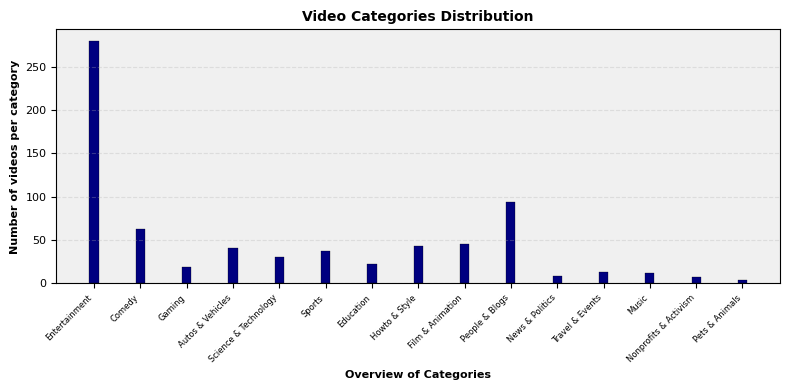

In [ ]:
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt

def get_video_info(filepath):
    try:
        with open(filepath, 'r') as json_file:
            data = json.load(json_file)
            return data["yt_meta_dict"]["info"]["categories"]
    except Exception as e:
        print(f"Error processing json at {filepath}: {e}")
        return []

def plot_category_graph(category_counts):
    categories = list(category_counts.keys())
    counts = list(category_counts.values())

    plt.figure(figsize=(8, 4))
    plt.bar(categories, counts, color='navy', linewidth=0.2, width=0.2, edgecolor='black')
    plt.xlabel('Overview of Categories', fontsize=8, fontweight='bold')
    plt.ylabel('Number of videos per category', fontsize=8, fontweight='bold')
    plt.title('Video Categories Distribution', fontsize=10, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=6)
    plt.yticks(fontsize=8)
    plt.gca().set_facecolor('#f0f0f0')  # Light background color
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

def calculate_category_counts(root_folder):
    category_counts = defaultdict(int)

    for folder_name in ['00000', '00001', '00002', '00003']:
        folder_path = os.path.join(root_folder, folder_name)

        if os.path.isdir(folder_path):
            for sub_folder_name in os.listdir(folder_path):
                sub_folder_path = os.path.join(folder_path, sub_folder_name)

                if os.path.isdir(sub_folder_path):
                    has_video = False
                    has_json = False

                    for file_name in os.listdir(sub_folder_path):
                        if file_name.endswith(".json"):
                            json_path = os.path.join(sub_folder_path, file_name)
                            categories = get_video_info(json_path)
                            for category in categories:
                                category_counts[category] += 1
                            has_json = True

                    if has_json:
                        has_video = any(file.endswith(".mp4") for file in os.listdir(sub_folder_path))
                        if not has_video:
                            # Skip subfolder if no video file is found
                            continue

    return category_counts

if __name__ == "__main__":
    root_folder = "/content/drive/MyDrive/dataset_all1"
    category_counts = calculate_category_counts(root_folder)
    plot_category_graph(category_counts)


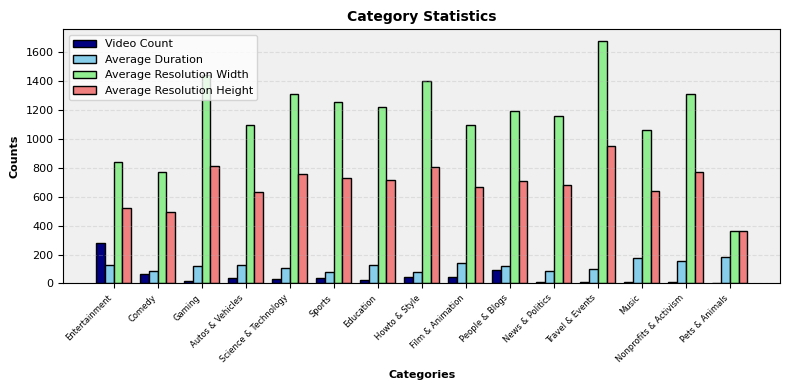

In [ ]:
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt

def get_video_info(filepath):
    try:
        with open(filepath, 'r') as json_file:
            data = json.load(json_file)
            return data["yt_meta_dict"]["info"]["categories"], data["yt_meta_dict"]["info"]["duration"], tuple(map(int, data["yt_meta_dict"]["info"]["resolution"].split("x")))
    except Exception as e:
        print(f"Error processing json at {filepath}: {e}")
        return [], 0, (0, 0)

def calculate_category_stats(root_folder):
    category_stats = defaultdict(lambda: {"video_count": 0, "total_duration": 0, "average_duration": 0, "total_resolution": (0, 0), "average_resolution": (0, 0)})

    for folder_name in ['00000', '00001', '00002', '00003']:
        folder_path = os.path.join(root_folder, folder_name)

        if os.path.isdir(folder_path):
            for sub_folder_name in os.listdir(folder_path):
                sub_folder_path = os.path.join(folder_path, sub_folder_name)

                if os.path.isdir(sub_folder_path):
                    has_video = False
                    has_json = False

                    for file_name in os.listdir(sub_folder_path):
                        if file_name.endswith(".json"):
                            json_path = os.path.join(sub_folder_path, file_name)
                            categories, duration, resolution = get_video_info(json_path)
                            for category in categories:
                                category_stats[category]["video_count"] += 1
                                category_stats[category]["total_duration"] += duration
                                category_stats[category]["total_resolution"] = (category_stats[category]["total_resolution"][0] + resolution[0], category_stats[category]["total_resolution"][1] + resolution[1])
                            has_json = True

                    if has_json:
                        has_video = any(file.endswith(".mp4") for file in os.listdir(sub_folder_path))
                        if not has_video:
                            # Skip subfolder if no video file is found
                            continue

    for category in category_stats:
        if category_stats[category]["video_count"] > 0:
            category_stats[category]["average_duration"] = category_stats[category]["total_duration"] / category_stats[category]["video_count"]
            category_stats[category]["average_resolution"] = (category_stats[category]["total_resolution"][0] / category_stats[category]["video_count"], category_stats[category]["total_resolution"][1] / category_stats[category]["video_count"])

    return category_stats

def plot_category_stats(category_stats):
    categories = list(category_stats.keys())
    video_counts = [category_stats[category]["video_count"] for category in categories]
    average_durations = [category_stats[category]["average_duration"] for category in categories]
    average_resolutions_width = [category_stats[category]["average_resolution"][0] for category in categories]
    average_resolutions_height = [category_stats[category]["average_resolution"][1] for category in categories]

    bar_width = 0.2
    index = range(len(categories))

    plt.figure(figsize=(8, 4))
    plt.bar(index, video_counts, color='navy', width=bar_width, label='Video Count', edgecolor='black')
    plt.bar([i + bar_width for i in index], average_durations, color='skyblue', width=bar_width, label='Average Duration', edgecolor='black')
    plt.bar([i + 2 * bar_width for i in index], average_resolutions_width, color='lightgreen', width=bar_width, label='Average Resolution Width', edgecolor='black')
    plt.bar([i + 3 * bar_width for i in index], average_resolutions_height, color='red', width=bar_width, label='Average Resolution Height', edgecolor='black')

    plt.xlabel('Categories', fontsize=8, fontweight='bold')
    plt.ylabel('Counts', fontsize=8, fontweight='bold')
    plt.title('Category Statistics', fontsize=10, fontweight='bold')
    plt.xticks([i + 1.5 * bar_width for i in index], categories, rotation=45, ha='right', fontsize=6)
    plt.yticks(fontsize=8)
    plt.gca().set_facecolor('#f0f0f0')  # Light background color
    plt.legend(fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    root_folder = "/content/drive/MyDrive/dataset_all1"
    category_stats = calculate_category_stats(root_folder)
    plot_category_stats(category_stats)


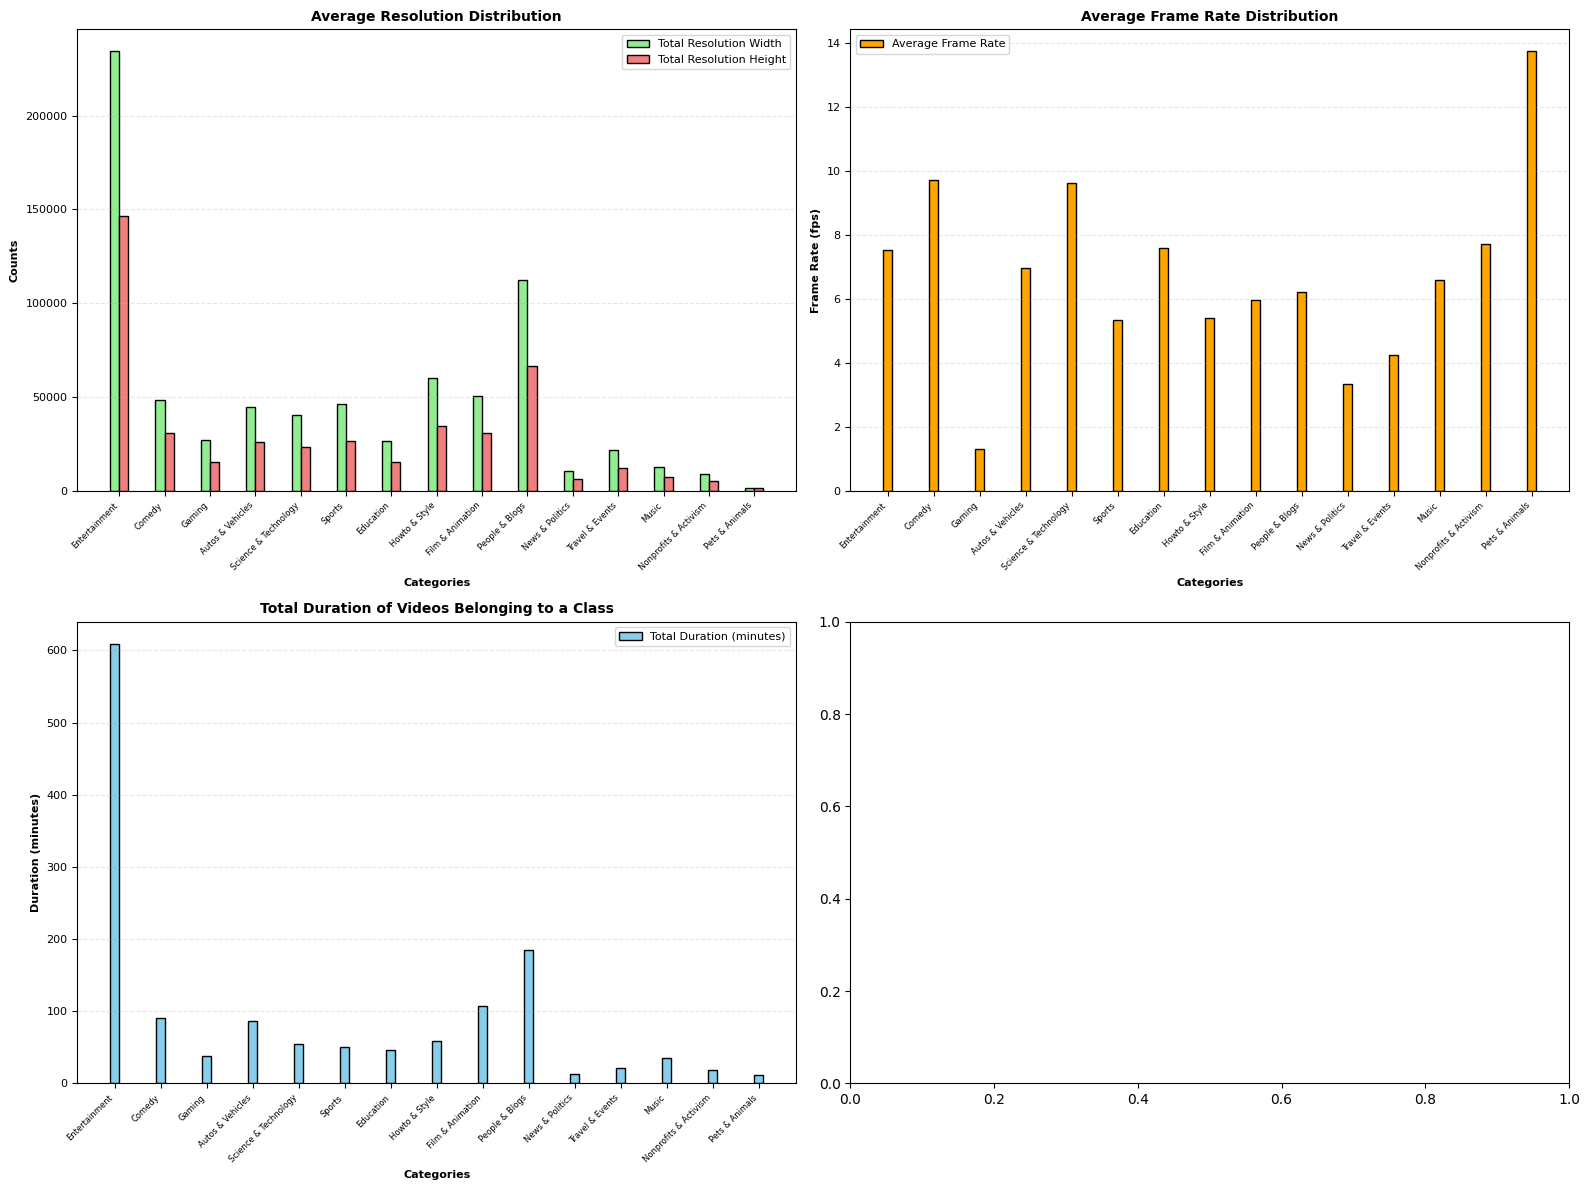

In [ ]:
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip

def get_video_info(filepath):
    try:
        with open(filepath, 'r') as json_file:
            data = json.load(json_file)
            return data["yt_meta_dict"]["info"]["categories"], data["yt_meta_dict"]["info"]["duration"], tuple(map(int, data["yt_meta_dict"]["info"]["resolution"].split("x")))
    except Exception as e:
        print(f"Error processing json at {filepath}: {e}")
        return [], 0, (0, 0)

def calculate_category_stats(root_folder):
    category_stats = defaultdict(lambda: {"video_count": 0, "total_duration": 0, "total_resolution": (0, 0), "total_frame_rate": 0})

    for folder_name in ['00000', '00001', '00002', '00003']:
        folder_path = os.path.join(root_folder, folder_name)

        if os.path.isdir(folder_path):
            for sub_folder_name in os.listdir(folder_path):
                sub_folder_path = os.path.join(folder_path, sub_folder_name)

                if os.path.isdir(sub_folder_path):
                    has_video = False
                    has_json = False
                    categories = []  # Initialize categories list here

                    for file_name in os.listdir(sub_folder_path):
                        if file_name.endswith(".json"):
                            json_path = os.path.join(sub_folder_path, file_name)
                            categories, duration, resolution = get_video_info(json_path)
                            for category in categories:
                                category_stats[category]["video_count"] += 1
                                category_stats[category]["total_duration"] += duration
                                category_stats[category]["total_resolution"] = (category_stats[category]["total_resolution"][0] + resolution[0], category_stats[category]["total_resolution"][1] + resolution[1])
                            has_json = True

                        elif file_name.endswith(".mp4"):
                            video_path = os.path.join(sub_folder_path, file_name)
                            clip = VideoFileClip(video_path)
                            frame_rate = clip.fps
                            if categories:
                                category = categories[0]  # Use categories if available
                                category_stats[category]["total_frame_rate"] += frame_rate
                            clip.close()

                    if has_json:
                        has_video = any(file.endswith(".mp4") for file in os.listdir(sub_folder_path))
                        if not has_video:
                            # Skip subfolder if no video file is found
                            continue

    return category_stats

def plot_category_stats(category_stats):
    categories = list(category_stats.keys())
    video_counts = [category_stats[category]["video_count"] for category in categories]
    total_durations = [category_stats[category]["total_duration"] for category in categories]
    total_durations_minutes = [duration / 60 for duration in total_durations]  # Convert to minutes
    total_resolutions_width = [category_stats[category]["total_resolution"][0] for category in categories]
    total_resolutions_height = [category_stats[category]["total_resolution"][1] for category in categories]
    total_frame_rates = [category_stats[category]["total_frame_rate"] for category in categories]
    average_frame_rates = [total_frame_rate / video_count if video_count > 0 else 0 for total_frame_rate, video_count in zip(total_frame_rates, video_counts)]

    bar_width = 0.2
    index = range(len(categories))

    plt.figure(figsize=(16, 12))

    # First Plot: Average Resolution Distribution
    plt.subplot(2, 2, 1)
    plt.bar(index, total_resolutions_width, color='lightgreen', width=bar_width, label='Total Resolution Width', edgecolor='black')
    plt.bar([i + bar_width for i in index], total_resolutions_height, color='lightcoral', width=bar_width, label='Total Resolution Height', edgecolor='black')
    plt.xlabel('Categories', fontsize=8, fontweight='bold')
    plt.ylabel('Counts', fontsize=8, fontweight='bold')
    plt.title('Average Resolution Distribution', fontsize=10, fontweight='bold')
    plt.xticks([i + 0.5 * bar_width for i in index], categories, rotation=45, ha='right', fontsize=6)
    plt.yticks(fontsize=8)
    plt.legend(fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Second Plot: Average Frame Rate Distribution
    plt.subplot(2, 2, 2)
    plt.bar(index, average_frame_rates, color='orange', width=bar_width, label='Average Frame Rate', edgecolor='black')
    plt.xlabel('Categories', fontsize=8, fontweight='bold')
    plt.ylabel('Frame Rate (fps)', fontsize=8, fontweight='bold')
    plt.title('Average Frame Rate Distribution', fontsize=10, fontweight='bold')
    plt.xticks([i for i in index], categories, rotation=45, ha='right', fontsize=6)
    plt.yticks(fontsize=8)
    plt.legend(fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Third Plot: Total Duration of Videos Belonging to a Class
    plt.subplot(2, 2, 3)
    plt.bar(index, total_durations_minutes, color='skyblue', width=bar_width, label='Total Duration (minutes)', edgecolor='black')
    plt.xlabel('Categories', fontsize=8, fontweight='bold')
    plt.ylabel('Duration (minutes)', fontsize=8, fontweight='bold')
    plt.title('Total Duration of Videos Belonging to a Class', fontsize=10, fontweight='bold')
    plt.xticks([i for i in index], categories, rotation=45, ha='right', fontsize=6)
    plt.yticks(fontsize=8)
    plt.legend(fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Fourth Plot: Extract Titles from JSON Files and Plot a Distribution of Actions
    plt.subplot(2, 2, 4)
    # Add your code to extract titles from JSON files and plot the distribution of actions here

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    root_folder = "/content/drive/MyDrive/dataset_all1"
    category_stats = calculate_category_stats(root_folder)
    plot_category_stats(category_stats)
